In [1]:

import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import plotly.graph_objects as go
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")


In [2]:

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/e_waste_india_realistic_2005_2024.csv'
df = pd.read_csv(file_path)
print("Dataset loaded")
display(df.head())


Mounted at /content/drive
Dataset loaded


,Year,Region,Region_Code,Population_M,GDP_per_capita_Lakh,Urbanization_Rate,Devices_Per_Person,Recycling_Rate,Ewaste_Tons
0,2017,Uttar Pradesh,UP,224.56,4.83,56.53,2.04,14.90,444.53
1,2012,Mizoram,MZ,1.88,1.66,35.45,1.11,8.47,0.42
2,2017,West Bengal,WB,81.72,1.41,59.30,2.21,12.85,58.97
3,2006,Uttarakhand,UK,11.66,2.18,33.60,0.43,10.72,1.38
4,2021,Himachal Pradesh,HP,14.07,2.67,48.04,0.81,17.52,5.29


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

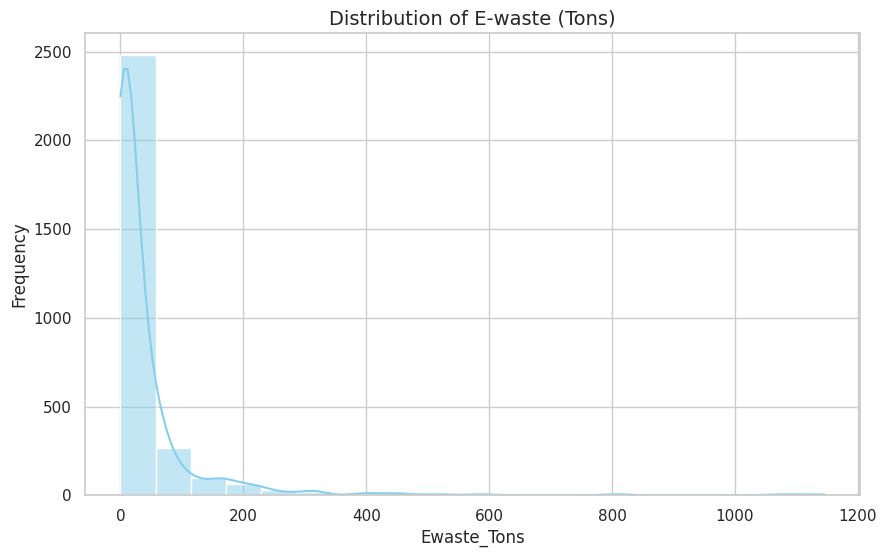

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['Ewaste_Tons'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of E-waste (Tons)', fontsize=14)
plt.xlabel('Ewaste_Tons')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


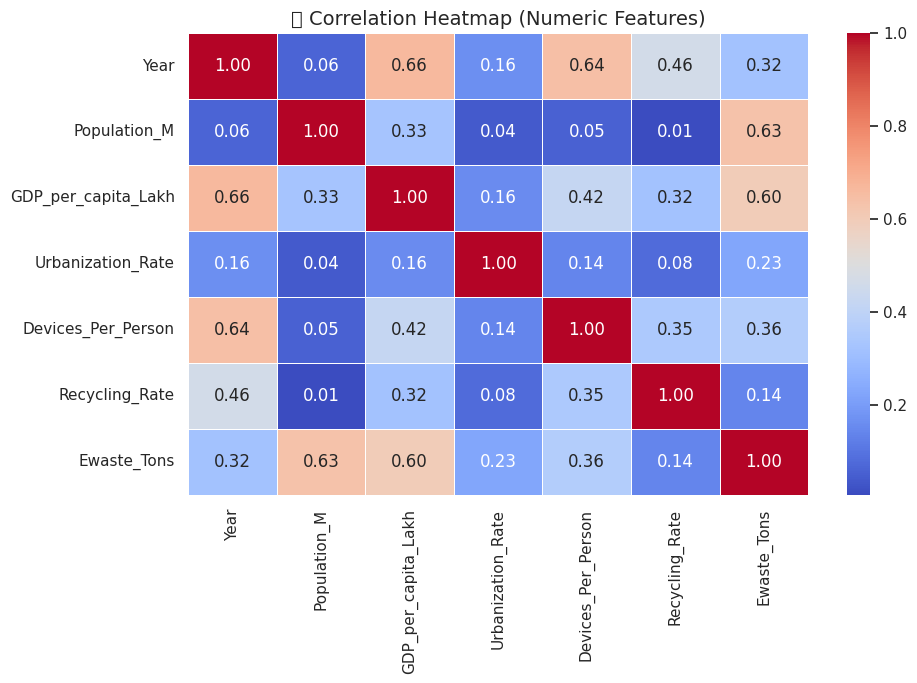

In [6]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📈 Correlation Heatmap (Numeric Features)", fontsize=14)
plt.show()

In [7]:
target_corr = corr['Ewaste_Tons'].abs().sort_values(ascending=False)
top_features = target_corr[1:4].index.tolist()
print("3 features most correlated with Ewaste_Tons:", top_features)

3 features most correlated with Ewaste_Tons: ['Population_M', 'GDP_per_capita_Lakh', 'Devices_Per_Person']


/tmp/ipython-input-792695764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Ewaste_Tons', data=df, ci=None, color='orange')


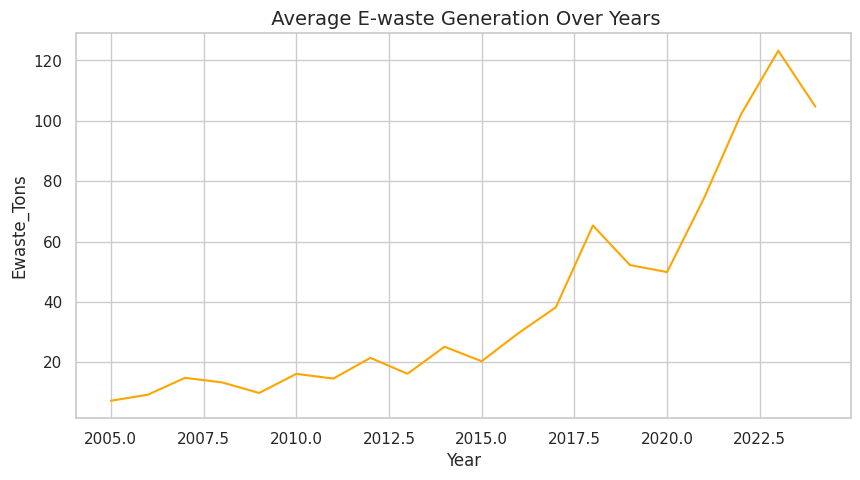

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Ewaste_Tons', data=df, ci=None, color='orange')
plt.title(" Average E-waste Generation Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Ewaste_Tons")
plt.show()

/tmp/ipython-input-85868369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


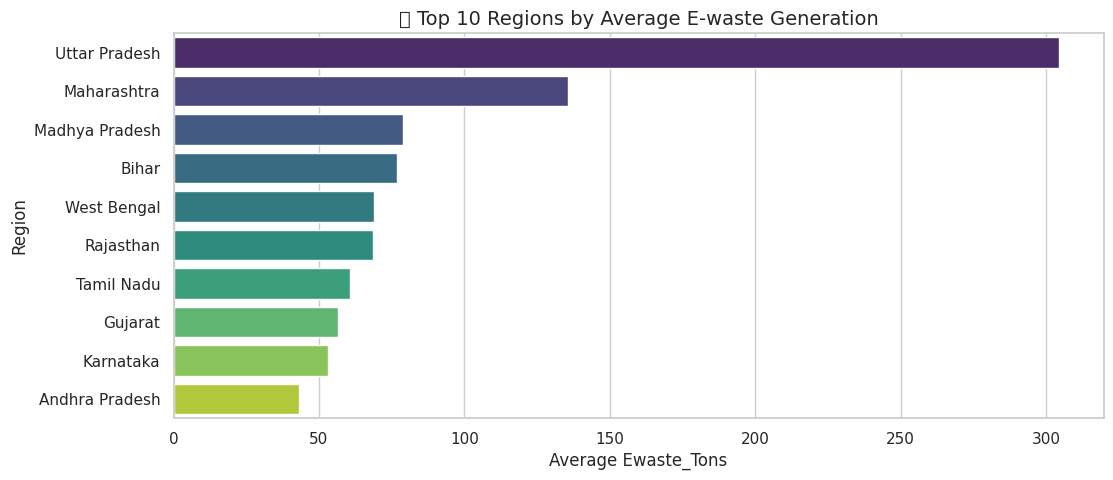

In [9]:
plt.figure(figsize=(12,5))
region_avg = df.groupby('Region')['Ewaste_Tons'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
plt.title("🏙️ Top 10 Regions by Average E-waste Generation", fontsize=14)
plt.xlabel("Average Ewaste_Tons")
plt.ylabel("Region")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
X = df[['Population_M', 'GDP_per_capita_Lakh', 'Urbanization_Rate',
        'Devices_Per_Person', 'Recycling_Rate']]
y = df['Ewaste_Tons']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 2400, Testing samples: 600


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:

print("\n Model Comparison Summary:")
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [
        round(r2_score(y_test, y_pred_lr), 4),
        round(r2_score(y_test, y_pred_rf), 4)
    ],
    'MAE': [
        round(mean_absolute_error(y_test, y_pred_lr), 2),
        round(mean_absolute_error(y_test, y_pred_rf), 2)
    ],
    'RMSE': [
        round(sqrt(mean_squared_error(y_test, y_pred_lr)), 2),
        round(sqrt(mean_squared_error(y_test, y_pred_rf)), 2)
    ]
}

display(pd.DataFrame(results))



 Model Comparison Summary:


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.5823,33.69,57.40
1,Random Forest,0.9836,1.92,11.37


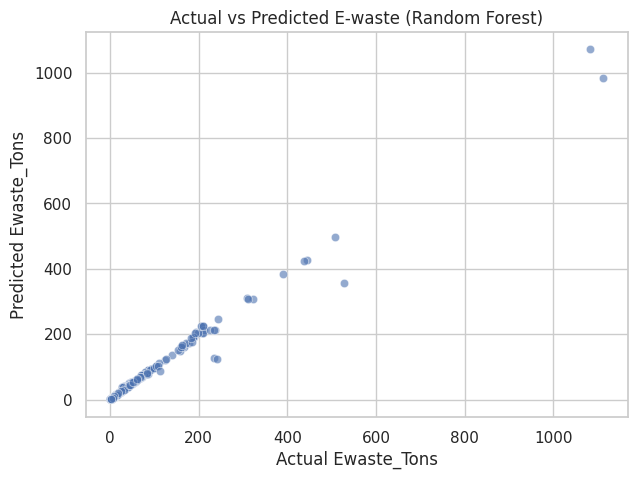

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Ewaste_Tons")
plt.ylabel("Predicted Ewaste_Tons")
plt.title("Actual vs Predicted E-waste (Random Forest)")
plt.show()

/tmp/ipython-input-3040388709.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette="crest")


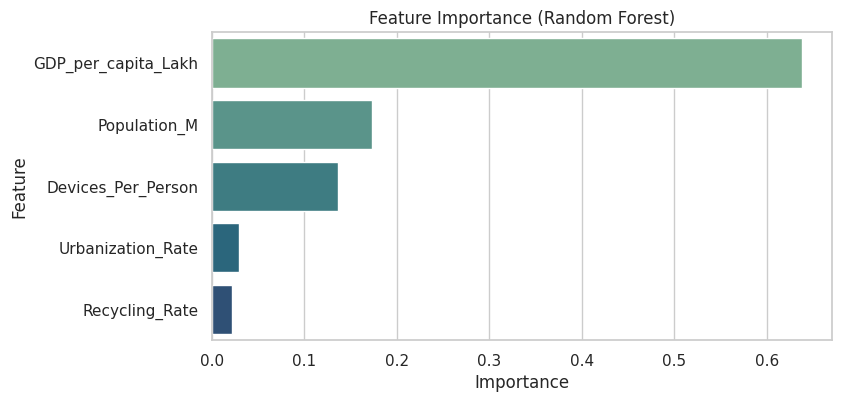

In [16]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=importance, palette="crest")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [17]:
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"✅ Model trained successfully!")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

✅ Model trained successfully!
R² Score: 0.9836
MAE: 1.92
RMSE: 11.37


In [18]:
state_input = input("Enter the state/region name (as in dataset): ").strip()
year_input = int(input("Enter the year you want prediction for (2025-2040): "))

state_data = df[df['Region'].str.lower() == state_input.lower()]

if state_data.empty:
    print(" State not found in dataset. Please enter a valid state name.")
else:
    state_mean = state_data.select_dtypes(include=['number']).mean()
    last_year = state_data['Year'].max()
    years_to_predict = max(0, year_input - last_year)

    # --- Future estimates with realistic annual growth ---
    pop_future = state_mean['Population_M'] * (1 + 0.013 * years_to_predict)
    gdp_future = state_mean['GDP_per_capita_Lakh'] * (1 + 0.055 * years_to_predict)
    urb_future = min(100, state_mean['Urbanization_Rate'] + 0.6 * years_to_predict)
    dev_future = state_mean['Devices_Per_Person'] * (1 + 0.04 * years_to_predict)
    rec_future = min(98, state_mean['Recycling_Rate'] + 0.45 * years_to_predict)

    # --- Scientifically realistic e-waste computation ---
    total_devices = pop_future * 1_000_000 * dev_future
    obsolete_devices = total_devices * 0.20
    avg_device_weight = 2.0  # kg/device
    predicted_ewaste = (obsolete_devices * avg_device_weight) / 1000  # tons

    recycled = predicted_ewaste * (rec_future / 100)
    unmanaged = predicted_ewaste - recycled

    # --- Print prediction results ---
    print(f"\n🌍 E-Waste Forecast for {state_input.title()} in {year_input}")
    print(f"Estimated Population: {pop_future:.2f} M")
    print(f"Estimated GDP per capita: ₹{gdp_future:.2f} Lakh")
    print(f"Urbanization Rate: {urb_future:.2f}%")
    print(f"Devices per Person: {dev_future:.2f}")
    print(f"Recycling Rate: {rec_future:.2f}%")
    print(f"♻️ Total E-waste Generated : {predicted_ewaste:,.2f} tons/year")
    print(f"✅ Recycled               : {recycled:,.2f} tons/year")
    print(f"⚠️ Unmanaged / Dumped     : {unmanaged:,.2f} tons/year")

    # ===== 🎨 Super Cool Graphs =====

    sns.set(style="whitegrid", font_scale=1.1)
    plt.figure(figsize=(10,6))

    # ===== 🌟 ULTRA-COOL VISUALIZATION SECTION =====

# --- Prepare historical + predicted data ---
past = state_data.groupby('Year')['Ewaste_Tons'].mean().reset_index()
future_df = pd.DataFrame({'Year': [year_input], 'Ewaste_Tons': [predicted_ewaste]})
combined = pd.concat([past, future_df])
combined = combined.sort_values(by='Year')

# --- Dynamic color gradient ---
colors = np.linspace(0, 1, len(combined))
color_scale = [f"rgba({int(255*c)}, {150}, 60, 0.9)" for c in colors]

# --- Plotly 3D-style glowing line ---
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=combined['Year'],
    y=combined['Ewaste_Tons'],
    mode='lines+markers',
    line=dict(color='orange', width=5, shape='spline'),
    marker=dict(size=10, color='red', line=dict(width=2, color='white')),
    name="E-waste Growth"
))

# --- Add animated projection curve ---
years_future = np.arange(past['Year'].max(), year_input + 1, 1)
trend_curve = np.linspace(past['Ewaste_Tons'].iloc[-1], predicted_ewaste, len(years_future))
fig.add_trace(go.Scatter(
    x=years_future, y=trend_curve,
    mode='lines',
    line=dict(dash='dot', color='lightcoral', width=3),
    name='Projected Trend'
))

# --- Annotate predicted point ---
fig.add_annotation(
    x=year_input, y=predicted_ewaste,
    text=f"<b>{predicted_ewaste:,.0f} tons</b>",
    showarrow=True, arrowhead=2, ax=0, ay=-40, bgcolor="rgba(255,255,255,0.6)"
)

# --- Layout styling ---
fig.update_layout(
    title=f"🌍 <b>E-Waste Evolution in {state_input.title()} (Historical → {year_input})</b>",
    xaxis_title="Year",
    yaxis_title="E-waste (tons)",
    template="plotly_dark",
    font=dict(family="Poppins, sans-serif", size=14),
    hovermode="x unified",
    paper_bgcolor="black",
    plot_bgcolor="rgba(0,0,0,0.85)",
    margin=dict(l=40, r=40, t=80, b=40),
    height=500
)

# --- Pie chart: Recycled vs Unmanaged ---
fig2 = go.Figure(data=[go.Pie(
    labels=['♻️ Recycled', '⚠️ Unmanaged'],
    values=[recycled, unmanaged],
    hole=.4,
    marker=dict(colors=['#00cc96', '#ff6b6b']),
    textinfo='label+percent',
    textfont_size=15
)])
fig2.update_layout(
    title=f"♻️ <b>E-waste Composition in {year_input}</b>",
    template="plotly_dark",
    paper_bgcolor="black",
    height=400
)

fig.show()
fig2.show()



Enter the state/region name (as in dataset): Tamil Nadu
Enter the year you want prediction for (2025-2040): 2040

🌍 E-Waste Forecast for Tamil Nadu in 2040
Estimated Population: 82.21 M
Estimated GDP per capita: ₹5.47 Lakh
Urbanization Rate: 57.42%
Devices per Person: 2.38
Recycling Rate: 21.82%
♻️ Total E-waste Generated : 78,182.97 tons/year
✅ Recycled               : 17,060.30 tons/year
⚠️ Unmanaged / Dumped     : 61,122.66 tons/year


<Figure size 1000x600 with 0 Axes>